<a href="https://colab.research.google.com/github/philjaycee/SBC_Final/blob/main/regresi_linear_kc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

df = pd.read_csv('Kcpenman.csv')
df.head(2000)

,X,Y
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1995,0.0,0.0
1996,0.0,0.0
1997,0.0,0.0
1998,0.0,0.0


In [ ]:
df.describe()

,X,Y
count,2.356400e+04,23564.000000
mean,5.367415e-02,0.211418
std,6.256333e-02,0.737348
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,1.263770e-11,0.000000
75%,1.170000e-01,0.000000
max,2.270000e-01,8.447304


In [ ]:
msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]

In [ ]:
print(len(train_df))
print(len(test_df))

18845
4719


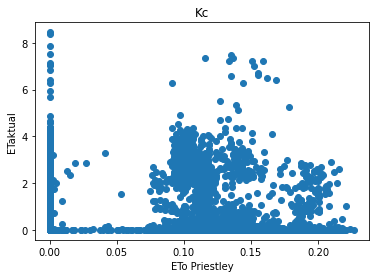

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['X'], df['Y'])
plt.xlabel('ETo Priestley')
plt.ylabel('ETaktual')
plt.title('Kc')
plt.show()

In [ ]:
x = train_df['X'].values
y = train_df['Y'].values

In [ ]:
def mean(values):
    return np.mean(values)

In [ ]:
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [ ]:
mean_X, mean_Y = mean(x), mean(y)

In [ ]:
var_x, var_y = variance(x, mean_X), variance(y, mean_Y)

In [ ]:
print(mean_X, var_x)

0.05370289902919621 73.80501708910161


In [ ]:
print(mean_Y, var_y)

0.21234893688463782 10343.131566617183


In [ ]:
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x)*(y[i] - mean_y)
    return covar

In [ ]:
covariance(x, mean_X, y, mean_Y)

44.71306791223644

In [ ]:
def coefficients(data):
    a,b = list(data)
    x = data[a].values
    y = data[b].values
    mean_x, mean_y = mean(x), mean(y)
    b1 = covariance(x, mean_x, y, mean_y) / variance(x, mean_x)
    b0 = mean_y - b1 * mean_x
    return [b0, b1]
  


In [ ]:
coefficients(df)

[0.17905371229525563, 0.6029722675926475]

In [ ]:
def plotting(data):
  
    a,b = list(data)
    x = data[a].values
    y = data[b].values
    mean_x, mean_y = mean(x), mean(y)
    b1 = covariance(x, mean_x, y, mean_y) / variance(x, mean_x)
    b0 = mean_y - b1 * mean_x
    masukan_coeficients = coefficients(df)
    b_3 , a_3 = masukan_coeficients[0], masukan_coeficients[1]
    y_pred = b_3 + a_3 * x
    #gabung = garis_liniear.append(submasi)
    plotting_2 = plt.scatter(df['X'], df['Y'])
    plotting_3 = plt.plot(df['X'],y_pred,'r')
    plt.xlabel('ETo Dual_Coeff  (mm/ menit)')
    plt.ylabel('ETo Penman-Monteith (mm / menit)')
    plt.title('R2 Dual_Coeff && Penman_Monteith')
    plot_in = plt.show()
    return (plot_in)

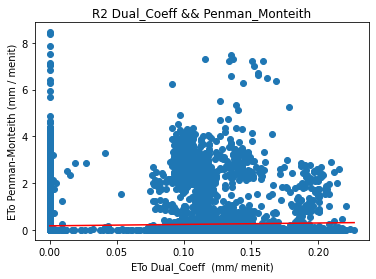

In [ ]:
plotting(df)

In [ ]:
def rsquare(data):
    a,b = list(data)
    x = data[a].values
    y = data[b].values
    mean_x, mean_y = mean(x), mean(y)
    b1 = covariance(x, mean_x, y, mean_y) / variance(x, mean_x)
    b0 = mean_y - b1 * mean_x
    masukan_coeficients = coefficients(df)
    b_3 , a_3 = masukan_coeficients[0], masukan_coeficients[1]
    y_pred = b_3 + a_3 * x
    #gabung = garis_liniear.append(submasi)
    res = y - y_pred
    tot = y -y.mean()
    R_squared = 1 - res.dot(res) / tot.dot(tot)
    return (R_squared)

In [ ]:
rsquare(df)

0.0026175183026011517